# Neural Networks - Project 2


In [0]:
 %tensorflow_version 2.x

In [5]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [0]:
tf.random.set_seed(42)

In [0]:
#Import Libraries
import pandas as pd
import h5py
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Data fetching and understand the train/val/test splits.

In [0]:
data = h5py.File("/content/drive/My Drive/SVHN_sg.h5", "r")

In [0]:
data

<HDF5 file "SVHN_sg.h5" (mode r)>

In [10]:
list(data.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_test = data["X_test"]
X_train = data["X_train"]
X_val = data["X_val"]
y_test = data["y_test"]
y_train = data["y_train"]
y_val = data["y_val"]

In [0]:
X_test

<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">

In [0]:
X_test = np.array(X_test)
X_train = np.array(X_train)
X_val = np.array(X_val)
y_test = np.array(y_test)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [0]:
X_test.shape

(18000, 32, 32)

In [0]:
y_train.shape

(42000,)

In [0]:
#It has 18000 record points and "32,,32" are their dimensions.

In [0]:
#Convert train and test labels to one hot vectors - 1-9 and 10 would be for 0 as this is single digit classification.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


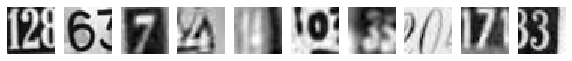

In [15]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))    # --- no labels as this is a regression problem not a classfication one
plt.show()

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


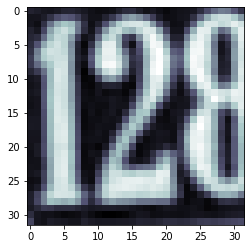

In [16]:
print('Label: ', y_train[0])
plt.imshow(X_train[0].reshape(32,32), cmap=plt.cm.bone);

In [0]:
#Normalize both the train and test image data to 0-1
x_train_scaled = np.subtract(X_train, np.min(X_train))/np.subtract(np.max(X_train),np.min(X_train))
x_test_scaled = np.subtract(X_test, np.min(X_test))/np.subtract(np.max(X_test),np.min(X_test))
x_val_scaled = np.subtract(X_val, np.min(X_val))/np.subtract(np.max(X_val),np.min(X_val))

In [0]:
np.max(x_train_scaled)

1.0

In [0]:
#Reshape the data from 32x32 to 32x32x1 to match input dimensions in Conv2D layer in keras
x_train_reshape = tf.keras.backend.expand_dims(x_train_scaled, axis=-1)

In [0]:
x_train_reshape.shape

TensorShape([42000, 32, 32, 1])

In [0]:
x_test_reshape = tf.keras.backend.expand_dims(x_test_scaled, axis=-1)

In [0]:
x_test_reshape.shape

TensorShape([18000, 32, 32, 1])

In [0]:
x_val_reshape = tf.keras.backend.expand_dims(x_val_scaled, axis=-1)

In [0]:
x_val_reshape.shape

TensorShape([60000, 32, 32, 1])

##Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

In [0]:
#Importing the Libraries for building ANN model 
from tensorflow.keras.models import Sequential  #For building the Neural Network layer by layer
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Reshape, Flatten #Dense - To randomly initialize the weights to small numbers close to 0(But not 0)
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.backend import backend

In [0]:
tf.keras.backend.clear_session()

# Initialize Sequential model
model = Sequential()

model.add(Reshape((32,32,1),input_shape=(32,32,1)))


In [0]:
#Add convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))


In [0]:
#Add MaxPooling layer
model.add(MaxPool2D(pool_size=(2,2)))


#Add another dropout layer
model.add(Dropout(0.25))

In [0]:
#Flatten the output
model.add(Flatten())

In [0]:
#Fully Connected Dense layer - 1st
model.add(Dense(100, activation='relu'))

#Dense layer - 2nd
model.add(Dense(100, activation='relu'))

#Dense layer - 3rd
model.add(Dense(10, activation='relu'))

In [0]:
#Output layer
#Sigmoid activation function is used whenever we need Probabilities of 2 categories or less(Similar to Logistic Regression)
#We would switch to Softmax as the dependent variable has more than 2 categories

model.add(Dense(10, activation='softmax'))

In [0]:
# Compile the model
#Here we would be using 'adam' optimizer and loss as 'categorical_crossentropy'.
#if more than 2 categories then we use - categorical_crossentropy
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [193]:
#Train the model
model.fit(x_train_reshape,y_train,          
          validation_data=(x_val_reshape,y_val),
          epochs=10,
          batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 36s 851us/sample - loss: 2.1564 - accuracy: 0.1798 - val_loss: 1.8898 - val_accuracy: 0.2738
Epoch 2/10
42000/42000 [==============================] - 35s 836us/sample - loss: 1.5711 - accuracy: 0.4387 - val_loss: 1.3001 - val_accuracy: 0.5731
Epoch 3/10
42000/42000 [==============================] - 35s 831us/sample - loss: 1.1245 - accuracy: 0.6347 - val_loss: 0.9178 - val_accuracy: 0.7268
Epoch 4/10
42000/42000 [==============================] - 35s 837us/sample - loss: 0.8822 - accuracy: 0.7314 - val_loss: 0.7775 - val_accuracy: 0.7729
Epoch 5/10
42000/42000 [==============================] - 35s 832us/sample - loss: 0.7715 - accuracy: 0.7699 - val_loss: 0.6962 - val_accuracy: 0.8014
Epoch 6/10
42000/42000 [==============================] - 35s 836us/sample - loss: 0.7006 - accuracy: 0.7923 - val_loss: 0.6163 - val_accuracy: 0.8242
Epoch 7/10
42000/42000 [====================

In [194]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               720100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1

In [195]:
#Training Accuracy
score = model.evaluate(x_train_reshape, y_train, verbose=0)
print("Train Loss : ", score[0])
print("Train Accuracy : ",score[1])

Train Loss :  0.4789819264525459
Train Accuracy :  0.86207145


In [196]:
#Testing Accuracy
score = model.evaluate(x_test_reshape, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ",score[1])

Test Loss :  0.5803298817343182
Test Accuracy :  0.8356111


##Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) 

In [0]:
tf.keras.backend.clear_session()

# Initialize Sequential model
model1 = Sequential()

model1.add(Reshape((32,32,1),input_shape=(32,32,1)))

In [0]:
#Add convolutional layer
model1.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

In [0]:
#Add MaxPooling layer
model1.add(MaxPool2D(pool_size=(2,2)))


#Add another dropout layer
model1.add(Dropout(0.25))

#Flatten the output
model1.add(Flatten())

In [0]:
#Fully Connected Dense layer - 1st
model1.add(Dense(100, activation='relu'))

#Dense layer - 2nd
model1.add(Dense(100, activation='relu'))

#Dense layer - 3rd
model1.add(Dense(10, activation='relu'))

In [0]:
#Output Layer
model1.add(Dense(10, activation='softmax'))

In [0]:

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer= sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [205]:
#Train the model
model1.fit(x_train_reshape,y_train,          
          validation_data=(x_val_reshape,y_val),
          epochs=10,
          batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 36s 856us/sample - loss: 2.3028 - accuracy: 0.1036 - val_loss: 2.3018 - val_accuracy: 0.1031
Epoch 2/10
42000/42000 [==============================] - 35s 843us/sample - loss: 2.3008 - accuracy: 0.1178 - val_loss: 2.2982 - val_accuracy: 0.1136
Epoch 3/10
42000/42000 [==============================] - 35s 840us/sample - loss: 2.2811 - accuracy: 0.1629 - val_loss: 2.2316 - val_accuracy: 0.2032
Epoch 4/10
42000/42000 [==============================] - 35s 844us/sample - loss: 2.0716 - accuracy: 0.2561 - val_loss: 1.8637 - val_accuracy: 0.3488
Epoch 5/10
42000/42000 [==============================] - 35s 843us/sample - loss: 1.7431 - accuracy: 0.3873 - val_loss: 1.5983 - val_accuracy: 0.4394
Epoch 6/10
42000/42000 [==============================] - 35s 843us/sample - loss: 1.5580 - accuracy: 0.4595 - val_loss: 1.4337 - val_accuracy: 0.5239
Epoch 7/10
42000/42000 [====================

In [206]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               720100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1

In [208]:
#Training Accuracy
score_model1_train = model1.evaluate(x_train_reshape, y_train, verbose=0)
print("Train Loss : ", score_model1_train[0])
print("Train Accuracy : ",score_model1_train[1])

Train Loss :  0.9377683415639968
Train Accuracy :  0.71835715


In [209]:
#Testing Accuracy
score_model1_test = model.evaluate(x_test_reshape, y_test, verbose=0)
print("Test Loss : ", score_model1_test[0])
print("Test Accuracy : ",score_model1_test[1])

Test Loss :  0.5696177128950755
Test Accuracy :  0.8400556


##Implement batch normalization for training the neural network.

In [0]:
tf.keras.backend.clear_session()

# Initialize Sequential model
model2 = Sequential()

model2.add(Reshape((32,32,1),input_shape=(32,32,1)))

#normalize data
model2.add(BatchNormalization())

In [0]:

#Add convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

In [0]:
#Add MaxPooling layer
model2.add(MaxPool2D(pool_size=(2,2)))


#Add another dropout layer
model2.add(Dropout(0.25))

#Flatten the output
model2.add(Flatten())

In [0]:
#normalize data
model2.add(BatchNormalization())
#Fully Connected Dense layer - 1st
model2.add(Dense(100, activation='relu'))

#normalize data
model2.add(BatchNormalization())
#Dense layer - 2nd
model2.add(Dense(100, activation='relu'))

#normalize data
model2.add(BatchNormalization())
#Dense layer - 3rd
model2.add(Dense(10, activation='relu'))

In [0]:
#Output Layer
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [112]:
#Train the model
model2.fit(x_train_reshape,y_train,          
          validation_data=(x_val_reshape,y_val),
          epochs=10,
          batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 122s 3ms/sample - loss: 1.2410 - accuracy: 0.5900 - val_loss: 3.2040 - val_accuracy: 0.1532
Epoch 2/10
42000/42000 [==============================] - 121s 3ms/sample - loss: 0.4632 - accuracy: 0.8634 - val_loss: 1.1867 - val_accuracy: 0.6489
Epoch 3/10
42000/42000 [==============================] - 120s 3ms/sample - loss: 0.3256 - accuracy: 0.9034 - val_loss: 0.2840 - val_accuracy: 0.9213
Epoch 4/10
42000/42000 [==============================] - 120s 3ms/sample - loss: 0.2504 - accuracy: 0.9243 - val_loss: 0.2090 - val_accuracy: 0.9406
Epoch 5/10
42000/42000 [==============================] - 120s 3ms/sample - loss: 0.1988 - accuracy: 0.9406 - val_loss: 0.1851 - val_accuracy: 0.9484
Epoch 6/10
42000/42000 [==============================] - 119s 3ms/sample - loss: 0.1671 - accuracy: 0.9499 - val_loss: 0.1664 - val_accuracy: 0.9539
Epoch 7/10
42000/42000 [==========================

In [113]:
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

##Print the classification accuracy metrics 

In [214]:
#Training Accuracy
score_train_model2 = model2.evaluate(x_train_reshape, y_train, verbose=0)
print("Train Loss : ", score_train_model2[0])
print("Train Accuracy : ",score_train_model2[1])

Train Loss :  0.04200830354834242
Train Accuracy :  0.98833334


In [215]:
#Testing Accuracy
score_test_model2 = model2.evaluate(x_test_reshape, y_test, verbose=0)
print("Test Loss : ", score_test_model2[0])
print("Test Accuracy : ",score_test_model2[1])


Test Loss :  0.3891664120281736
Test Accuracy :  0.90533334


In [0]:
#Conclusion : After applying BatchNormalization and with Adam optimizer we have achieved test accuracy of 90%